# SIS on infinite random $k$-regular graph

In [14]:
using MatrixProductBP, MatrixProductBP.Models
using Plots
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

In [ ]:
include("../../telegram/notifications.jl")

In [23]:
T = 40         # final time
k = 4          # degree
γ = 1e-2       # prob. of zero patient
λ = 0.31
ρ = 0.3;

In [24]:
svd_trunc = TruncBond(16)
maxiter = 200
tol = 1e-3
pᵢ⁰ = [1-γ, γ]
A, iters, Δs = sis_infinite_graph(T, k, pᵢ⁰, λ, ρ; svd_trunc, maxiter, tol);

Iterating BP on infinite graph   6%|█▍                   |  ETA: 0:03:48
  iter:  13/200
  Δ:     0.0022813/0.001

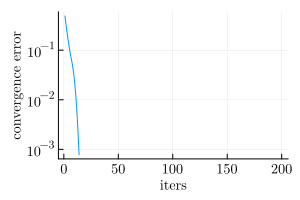

In [25]:
plot(Δs, ylabel="convergence error", xlabel="iters", yaxis=:log10, 
    size=(300,200), label="")

In [26]:
# compute magnetization, correlation and covariance
wᵢ = fill(SISFactor(λ, ρ), T)
b, m, c = observables_infinite_graph(A, k, pᵢ⁰, wᵢ; svd_trunc, showprogress=true);

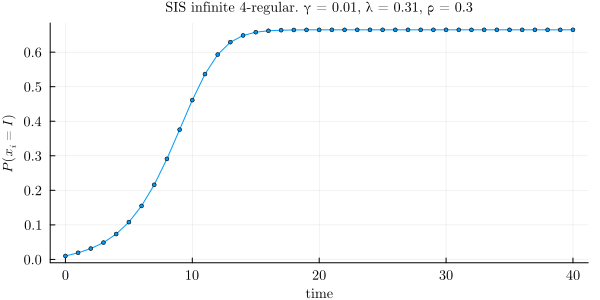

In [27]:
marg = [bᵗ[INFECTED] for bᵗ in b]
plot(0:T, marg, m=:o, xlabel="time", ylabel="\$P(x_i=I)\$", label="",
    size=(600,300), xticks=0:10:T, ms=2,titlefontsize=9,
    title = "SIS infinite $k-regular. γ = $γ, λ = $λ, ρ = $ρ")

In [28]:
using ColorSchemes
function plot_autocovs(c, T; skip_even=true, kw...)
    step = skip_even ? 2 : 1
    us = 10:10:T
    cg = cgrad(:matter, length(us), categorical=true)
    ylabel = "\$\\langle x_i^t x_i^{t+\\Delta t}\\rangle-" * 
        "\\langle x_i^t\\rangle\\langle x_i^{t+\\Delta t}\\rangle \$"
    xlabel = "\$\\Delta t \$"
    pl = plot(;xlabel, ylabel, legend=:outertopright, 
        title="SIS infinite $k-regular. γ = $γ, λ = $λ, ρ = $ρ")
     
    for (j,u) in enumerate(us)
        plot!(pl, u:-step:1, c[(0:step:u-1) .+ 1,u+1], label="t+Δt=$u", c=cg[j], m=:o, msc=cg[j]; kw...) 
    end
    pl
end  

plot_autocovs (generic function with 1 method)

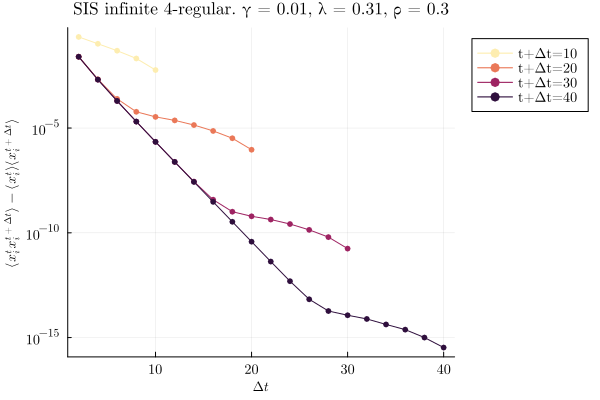

In [29]:
skip_even = true
pl_autocov = plot_autocovs(c, T; skip_even, yaxis=:log10)